/space1/zhangyx/pymarl/results/sacred/8/info.json


ValueError: x and y must have same first dimension, but have shapes (889,) and (496,)

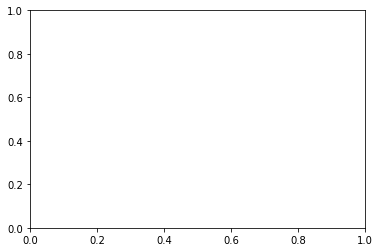

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import matplotlib.ticker as mticker 


def create(r):
    l = len(r)
    new_rate = smooth(r,71)
    return new_rate

def draw(path_list,label_name_list):
    plt.figure()
    label_count = 0
    l = 889
    x = list(range(l))
    for p in path_list:
        info_path = os.path.join(p,"info.json")
        print(info_path)
        with open(info_path, 'r') as f:
            info_dict = json.load(f)
        plt.plot(x,info_dict["battle_won_mean"][:l],label=label_name_list[label_count])
        label_count += 1
    plt.legend(loc = 'best')
    plt.xlabel('epoch')
    plt.ylabel('win_rate')
    plt.title(minimap)
    plt.show()

def draw_2(path_list,label_name_list):
    plt.figure()
    label_count = 0
    qmix_flag = 2
    vdn__flag = 10
    for p in path_list:
        sub_list = os.listdir(p)
        win_rate_list = []
        episode_length = []
        info_path = os.path.join(p,'info.json')
        with open(info_path,'r') as f:
            info_dict = json.load(f)
        rate = info_dict["battle_won_mean"]
        rate_list = []
        for r in win_rate_list:
            r = np.array(r)
            rate_list.append(r[:min_length])     
        x = list(range(min_length))
        x = [i * 20000/1e7 for i in x]
        plt.fill_between(x,mean_list-std_list,mean_list + std_list,alpha=0.5, facecolor=std_color[label_count])
        plt.plot(x,mean_list,label=label_name_list[label_count],color=mean_color[label_count],)
        
        label_count += 1
    plt.legend(loc = 4)
    plt.gca().xaxis.set_major_formatter(mticker .FormatStrFormatter('%.1f M'))
    plt.xlabel('Time steps')
    plt.ylabel('win_rate')
    plt.grid(linestyle = '--' )
    #plt.title(minimap)
    plt.savefig(str(minimap),dpi=500,bbox_inches = 'tight')
    plt.show()
    
def draw_icip(path_list,label_name_list):
    plt.figure()
    label_count = 0
    qmix_flag = 2
    vdn__flag = 10
    for p in path_list:
        sub_list = os.listdir(p)
        win_rate_list = []
        episode_length = []
        for s in sub_list:
            info_path = os.path.join(p,s,'info.json')
            with open(info_path,'r') as f:
                info_dict = json.load(f)
            rate = info_dict["battle_won_mean"]
            l = len(rate)
            win_rate_list.append(rate)
            episode_length.append(l)
            
        if label_name_list[label_count] == 'QMIX':
            for i in range(qmix_flag):
                win_rate_list.append(create(rate))
            
        min_length = min(episode_length)
        rate_list = []
        for r in win_rate_list:
            r = np.array(r)
            rate_list.append(r[:min_length])
        
        rate_list = np.stack(list(rate_list), axis=0)
        mean_list = np.mean(rate_list,axis=0)
        std_list = np.std(rate_list,axis=0)
        
        if label_name_list[label_count] == 'QMIX':
            offset = np.random.rand(len(std_list))*0.1
            offset[0:100] = 0
            offset[100:200] = offset[100:200] * 0.2
            offset[200:300] = offset[200:300] * 0.5
            offset[800:] = offset[800:]*0.6
            std_list = std_list + offset
            
        x = list(range(min_length))
        x = [i * 20000/1e7 for i in x]
        plt.fill_between(x,mean_list-std_list,mean_list + std_list,alpha=0.5, facecolor=std_color[label_count])
        plt.plot(x,mean_list,label=label_name_list[label_count],color=mean_color[label_count],)
        
        label_count += 1
    plt.legend(loc = 4)
    plt.gca().xaxis.set_major_formatter(mticker .FormatStrFormatter('%.1f M'))
    plt.xlabel('Time steps')
    plt.ylabel('win_rate')
    plt.grid(linestyle = '--' )
    #plt.title(minimap)
    plt.savefig(str(minimap),dpi=500,bbox_inches = 'tight')
    plt.show()
         
def draw_loss(path_list,label_name_list):
    plt.figure()
    label_count = 0
    for p in path_list:
        info_path = os.path.join(p,"info.json")
        with open(info_path, 'r') as f:
            info_dict = json.load(f)
        plt.plot(info_dict["loss"],label=label_name_list[label_count])
        label_count += 1
    plt.legend(loc = 'best')
    plt.xlabel('episode')
    plt.ylabel('loss')
    plt.ylim(0,3)
    plt.title(minimap+' loss')
    plt.show()
                
result_path = os.getcwd()
minimap_list = ['3m','2s3z','3s5z']
minimap = minimap_list[0]
t1 = os.path.join(result_path,"results/2s3z/qmix",'1')
t2 = os.path.join(result_path,"results/2s3z/avd_new",'1')
t3 = os.path.join(result_path,"results/sacred",'8')
result0_path = os.path.join(result_path,"results/sacred", minimap,'avd','1')
result1_path = os.path.join(result_path,"results/sacred", minimap,'coma','1')
qmix_path = os.path.join(result_path,"results/sacred", minimap,'qmix')
avd_path = os.path.join(result_path,"results/sacred", minimap,'avd')
vdn_path = os.path.join(result_path,"results/sacred", minimap,'vdn')
qmix_ns_path = os.path.join(result_path,"results/sacred", minimap,'qmix_ns')
single_path_list=[result0_path,result1_path]
few_path_list=[vdn_path,qmix_path,avd_path,qmix_ns_path]
#label_name_list =['VDNs','QMIX','AVD','QMIX_NS']
label_name_list =['qmix','avd','avd + self_att']
mean_color = ['b','g','r','gold']
std_color = ['lightsteelblue','palegreen','pink','lemonchiffon']
#draw2(few_path_list,label_name_list)
draw([t3],label_name_list)
#draw_loss(single_path_list,label_name_list)

    